In [1]:
!pip install ISLP

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import sklearn
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

  Using cached ISLP-0.3.21-py3-none-any.whl (3.6 MB)
  Using cached lifelines-0.27.8-py3-none-any.whl (350 kB)
  Using cached pygam-0.9.0-py3-none-any.whl (522 kB)
  Using cached pytorch_lightning-2.1.1-py3-none-any.whl (776 kB)
  Using cached scikit_learn-1.3.2-cp39-cp39-win_amd64.whl (9.3 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached autograd_gamma-0.5.0-py3-none-any.whl
  Using cached formulaic-0.6.6-py3-none-any.whl (91 kB)
  Using cached pygam-0.8.1-py3-none-any.whl (522 kB)
  Using cached pygam-0.8.0-py2.py3-none-any.whl (1.8 MB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [2]:
unemployment = pd.read_csv('unemployment_rate_raw.csv')
unemployment

,Geography,1976-01-01,1976-02-01,1976-03-01,1976-04-01,1976-05-01,1976-06-01,1976-07-01,1976-08-01,1976-09-01,...,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01
0,United States,7.9,7.7,7.6,7.7,7.4,7.6,7.8,7.8,7.6,...,3.5,3.4,3.6,3.5,3.4,3.7,3.6,3.5,3.8,3.8
1,Alabama,6.6,6.6,6.6,6.5,6.4,6.5,6.6,6.7,6.8,...,2.6,2.6,2.5,2.3,2.2,2.2,2.2,2.1,2.1,2.2
2,Alaska,7.1,7.1,7.0,6.9,6.9,7.1,7.3,7.6,8.0,...,3.7,3.8,3.8,3.7,3.7,3.6,3.7,3.8,3.9,4.1
3,Arizona,10.2,10.2,10.1,10.0,9.8,9.7,9.7,9.6,9.6,...,4.0,3.8,3.7,3.5,3.4,3.4,3.5,3.6,3.8,4.0
4,Arkansas,7.3,7.3,7.3,7.2,7.1,6.9,6.8,6.7,6.6,...,3.4,3.4,3.2,3.0,2.8,2.7,2.6,2.6,2.7,2.9
5,California,9.2,9.2,9.1,9.1,9.0,9.0,9.0,9.1,9.2,...,4.1,4.2,4.4,4.4,4.5,4.5,4.6,4.6,4.6,4.7
6,Colorado,5.8,5.7,5.7,5.6,5.6,5.6,5.8,5.9,6.1,...,2.8,2.8,2.9,2.8,2.8,2.8,2.8,2.9,3.1,3.2
7,Connecticut,9.8,9.8,9.8,9.6,9.4,9.3,9.1,9.0,8.8,...,4.0,3.9,4.0,3.9,3.8,3.7,3.7,3.6,3.5,3.5
8,Delaware,8.0,8.0,8.0,8.1,8.3,8.6,8.8,8.9,9.0,...,4.6,4.6,4.6,4.4,4.3,4.2,4.2,4.1,4.1,4.1
9,District of Columbia,8.7,8.7,8.6,8.5,8.4,8.3,8.4,8.5,8.7,...,4.2,4.5,4.7,4.8,5.0,5.1,5.1,5.0,5.0,5.0


In [3]:
school_unemployment = pd.read_csv('state_and_local_public_education_employment_raw_in_thousands.csv')
school_unemployment

,Geography,2012-01-01,2012-02-01,2012-03-01,2012-04-01,2012-05-01,2012-06-01,2012-07-01,2012-08-01,2012-09-01,...,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01
0,United States,10186.6,10650.2,10697.6,10662.3,10541.4,9867.7,8610.6,8876.0,10053.8,...,10626.2,10405.4,10787.5,10817.6,10826.6,10720.3,10121.8,9039.0,9474.7,10620.4
1,Alabama,162.0,166.7,168.2,165.5,163.1,157.6,143.8,147.7,158.3,...,172.7,168.5,171.1,171.8,171.6,171.5,169.2,160.7,165.0,171.8
2,Alaska,30.4,33.8,33.9,33.8,31.5,29.3,23.8,25.9,31.9,...,28.3,26.9,29.2,29.3,29.1,28.3,22.9,19.3,21.4,27.2
3,Arizona,190.5,202.0,201.9,202.1,191.9,152.2,134.9,175.5,200.1,...,189.0,191.8,198.0,197.0,199.4,193.5,152.7,151.0,185.5,201.7
4,Arkansas,104.8,108.3,108.8,108.7,108.7,99.9,88.0,92.5,104.6,...,102.2,99.6,101.8,102.1,102.6,101.6,93.4,82.2,87.0,100.6
5,California,1132.3,1158.7,1177.1,1171.8,1174.5,1154.0,977.9,990.4,1062.1,...,1190.7,1211.5,1226.7,1244.2,1248.8,1255.9,1234.6,1065.7,1111.0,1187.5
6,Colorado,184.5,196.4,198.1,196.7,196.8,179.7,159.7,166.1,190.4,...,222.9,212.5,223.3,225.6,224.8,225.6,211.2,197.5,206.3,224.4
7,Connecticut,122.1,130.1,130.3,129.2,126.1,115.4,98.5,99.8,124.0,...,125.2,123.6,125.6,126.3,124.8,123.0,114.2,96.7,97.8,124.5
8,Delaware,30.9,32.9,33.9,33.5,33.8,30.3,28.3,27.5,31.7,...,38.2,36.0,38.0,38.3,38.2,37.6,35.2,33.8,33.2,36.7
9,District of Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
unemployment.drop(unemployment.iloc[:,1:505], axis = 1, inplace = True)

In [5]:
school_unemployment.drop(school_unemployment.iloc[:, 1:73], axis = 1, inplace = True)

In [6]:
us_data = unemployment.iloc[0]
us_school_data = school_unemployment.iloc[0]

In [7]:
us_num = us_data.drop(['Geography'])
us_school_num = us_school_data.drop(['Geography'])

Text(0.5, 0, 'Date')

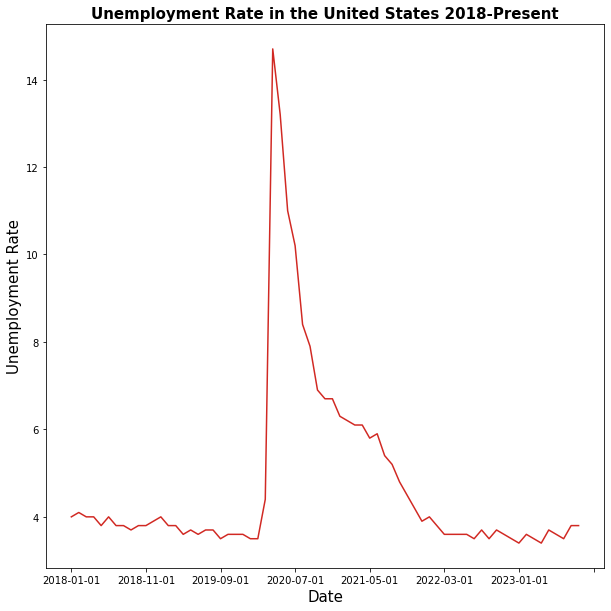

In [8]:
us_num.plot(y = 'Unemployment Rate', figsize = (10,10), color="#d12923")
plt.title("Unemployment Rate in the United States 2018-Present", fontweight="bold", fontsize=15)
plt.ylabel("Unemployment Rate", fontsize=15)
plt.xlabel("Date", fontsize=15)

Text(0, 0.5, 'Employment')

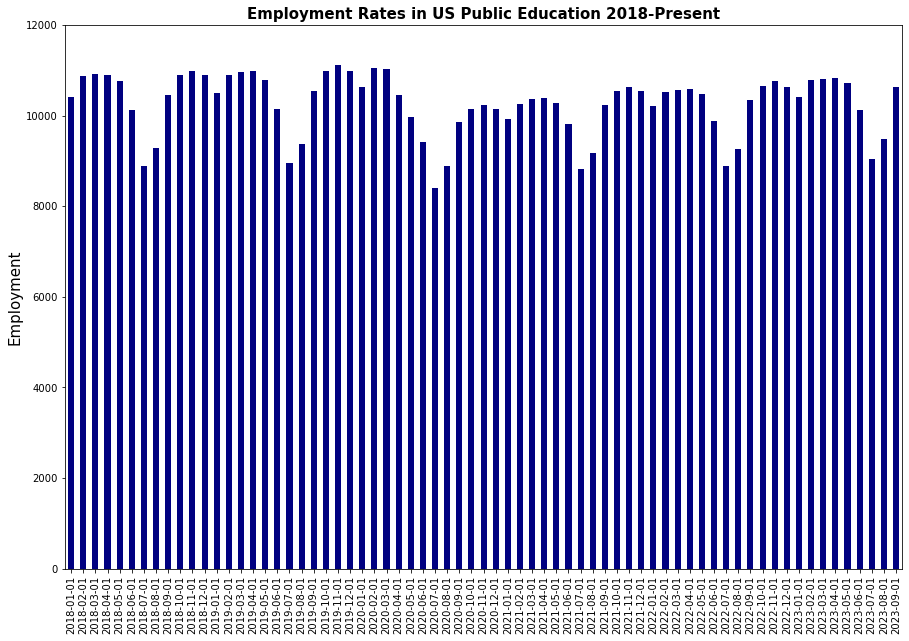

In [9]:
us_school_num.plot(kind="bar", y="Employment Rate", figsize=(15,10), ylim=(0,12000), color="navy")
plt.title("Employment Rates in US Public Education 2018-Present", fontweight="bold", fontsize=15)
plt.ylabel("Employment", fontsize=15)

Time is a confounding variable, so we need to look at covid cases